In [1]:
import os
import sys
import os.path as path
import numpy as np
import pandas as pd
import csv
import pickle
import json
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from datetime import date, datetime, timedelta, time
from timeit import default_timer as timer
import time

In [2]:
json_files_base_loc = '/p/lustre2/jha3/Wildfire/Wildfire_LDRD_SI/InputJson'

In [3]:
json_extract_base = os.path.join(json_files_base_loc, 'Extract/json_extract_data')
json_extract_counts = [2, 3, 4, 5, 6, 7, 8]

In [4]:
json_prep_base = os.path.join(json_files_base_loc, 'Prep/json_prep_data_label')
json_prep_counts = [1, 2, 3]

In [5]:
json_train_base = os.path.join(json_files_base_loc, 'Train/json_train_model')
json_train_counts = [1, 2, 3]

In [6]:
trained_models_metrics = dict()

In [7]:
for label_count in json_prep_counts:
    metric_for_label = dict()
    json_prep    = '%s_%03d.json'%(json_prep_base, label_count)
    #print(json_prep)
    with open(json_prep) as json_file_handle:
        json_content_prep_data = json.load(json_file_handle)
    label_count = json_content_prep_data['label_defn']['label_count']
    FM_label_type = json_content_prep_data['FM_labels']['label_type']
    #print('label_count: {}, FM_label_type: {}'.format(label_count, FM_label_type))
    
    for train_count in json_train_counts:
        metric_for_model = dict()
        json_train   = '%s_%03d.json'%(json_train_base, train_count)
        #print(json_train)
        with open(json_train) as json_file_handle:
            json_content_train_model = json.load(json_file_handle)
        model_count = json_content_train_model['models']['model_count']
        model_name = json_content_train_model['models']['model_name'] # ['RF', SVM', 'MLP']
        #print('Model Count: {}, Model Name: {}'.format(model_count, model_name))

        accuracy_train = []
        accuracy_test = []
        data_nomenclature = []
        for data_count in json_extract_counts:
            data_nomenclature.append(data_count)
            
            json_extract = '%s_%03d.json'%(json_extract_base, data_count)
            #print(json_extract)
            with open(json_extract) as json_file_handle:
                json_content_extract_data = json.load(json_file_handle)
            data_set_count = json_content_extract_data['data_set_defn']['data_set_count']
            #print('Data Set Count: {}'.format(data_set_count))
            
            # Names of trained model and related files
            trained_model_base_loc = json_content_train_model['paths']['trained_model_base_loc']
            trained_model_name = 'dataset_%03d_label_%03d_%s_model_%03d_%s'%(data_set_count, \
                                                        label_count, FM_label_type, \
                                                        model_count, model_name)

            trained_model_loc = os.path.join(trained_model_base_loc, trained_model_name)
            model_eval_file = '{}_eval'.format(trained_model_name)
            model_metric_file = os.path.join(trained_model_loc, model_eval_file+'.csv')
            #trained_model_file_name = '{}.pkl'.format(trained_model_name)
            #print('Trained Model Location: {}'.format(trained_model_loc))
            #print('Trained Model Metrric File: {}'.format(model_metric_file))
            
            eval_metric = pd.read_csv(model_metric_file).to_dict(orient='records')[0]
            #print('Eval Metrics: {}'.format(eval_metric))
            accuracy_train.append(eval_metric['accuracy_train'])
            accuracy_test.append(eval_metric['accuracy_test'])
            #print('\n')
            
        print('label_count: {}, FM_label_type: {}, Model Count: {}, Model Name: {}'.format(
            label_count, FM_label_type, model_count, model_name))
        #print('data_nomenclature: {}'.format(data_nomenclature))
        #print('accuracy_train: {}'.format(accuracy_train))
        #print('accuracy_test: {}'.format(accuracy_test))
        
        metric_for_model['data_nomenclature'] = data_nomenclature
        metric_for_model['accuracy_train'] = accuracy_train
        metric_for_model['accuracy_test'] = accuracy_test
        
        print('metric_for_model: \n{}'.format(metric_for_model))
        print('\n')
        metric_for_label[model_name] = metric_for_model
        
    print('metric_for_label: \n{}'.format(metric_for_label))
    print('\n')
    
    trained_models_metrics[FM_label_type] =  metric_for_label
    
print('trained_models_metrics: \n{}'.format(trained_models_metrics))
print('\n')            

label_count: 1, FM_label_type: Regression, Model Count: 1, Model Name: MLP
metric_for_model: 
{'data_nomenclature': [2, 3, 4, 5, 6, 7, 8], 'accuracy_train': [0.6000994370433408, 0.567841072738817, 0.5853448926528146, 0.5603487564600678, 0.5934833580653801, 0.5669169598154872, 0.5672453131177531], 'accuracy_test': [0.5965433263112541, 0.560285465686048, 0.5850084078336012, 0.5535156463408026, 0.5980547415927431, 0.5597215900563917, 0.5647955134960587]}


label_count: 1, FM_label_type: Regression, Model Count: 2, Model Name: SVM
metric_for_model: 
{'data_nomenclature': [2, 3, 4, 5, 6, 7, 8], 'accuracy_train': [0.5635497908014752, 0.5293258135727281, 0.5553277937725674, 0.5836753842794866, 0.5489985861926696, 0.5560215632884404, 0.5537564239533981], 'accuracy_test': [0.5437626864313565, 0.5184284687901803, 0.5338264305361053, 0.5425752353286264, 0.5213695755643675, 0.5217739213416239, 0.522832532137635]}


label_count: 1, FM_label_type: Regression, Model Count: 3, Model Name: RF
metric_fo

In [8]:
data_nomenclature

[2, 3, 4, 5, 6, 7, 8]

In [9]:
ds_name = np.array(data_nomenclature)

In [10]:
ds_name

array([2, 3, 4, 5, 6, 7, 8])

In [11]:
labels = list(trained_models_metrics.keys())
labels[0]

'Regression'

In [12]:
models = list(trained_models_metrics[labels[0]].keys())
models

['MLP', 'SVM', 'RF']

Text(0.5, 1.0, 'Test')

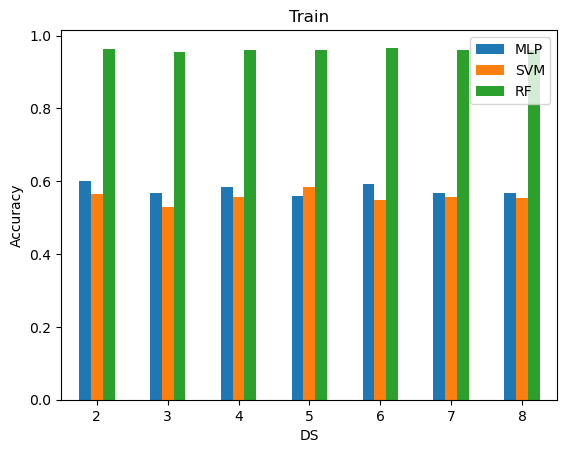

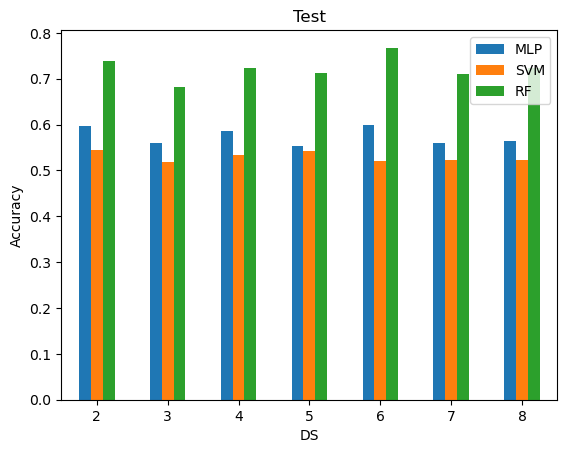

In [13]:
label = 'Regression'
train_accuracy_all_models = dict()
test_accuracy_all_models = dict()
for model in models:
    train_accuracy_all_models[model] = trained_models_metrics[label][model]['accuracy_train']
    test_accuracy_all_models[model] = trained_models_metrics[label][model]['accuracy_test']
    
    df_train = pd.DataFrame(train_accuracy_all_models, index = ds_name)
    df_test  = pd.DataFrame(test_accuracy_all_models, index = ds_name)
    
ax1 = df_train.plot.bar(rot = 0)
ax1.set_xlabel('DS')
ax1.set_ylabel('Accuracy')
ax1.set_title('Train')

ax2 = df_test.plot.bar(rot = 0)
ax2.set_xlabel('DS')
ax2.set_ylabel('Accuracy')
ax2.set_title('Test')

In [14]:
df_train

,MLP,SVM,RF
2,0.600099,0.563550,0.964044
3,0.567841,0.529326,0.955802
4,0.585345,0.555328,0.961260
5,0.560349,0.583675,0.960558
6,0.593483,0.548999,0.966587
7,0.566917,0.556022,0.959191
8,0.567245,0.553756,0.959758


In [15]:
df_test

,MLP,SVM,RF
2,0.596543,0.543763,0.739156
3,0.560285,0.518428,0.681764
4,0.585008,0.533826,0.723238
5,0.553516,0.542575,0.711422
6,0.598055,0.521370,0.767458
7,0.559722,0.521774,0.710827
8,0.564796,0.522833,0.724316


Text(0.5, 1.0, 'Test')

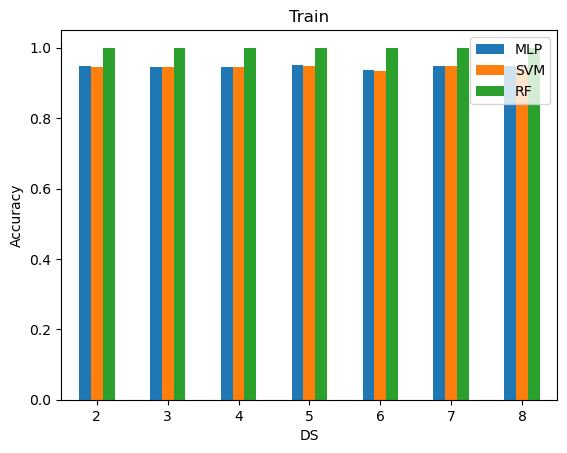

In [ ]:
label = 'Binary'
train_accuracy_all_models = dict()
test_accuracy_all_models = dict()
for model in models:
    train_accuracy_all_models[model] = trained_models_metrics[label][model]['accuracy_train']
    test_accuracy_all_models[model] = trained_models_metrics[label][model]['accuracy_test']
    
    df_train = pd.DataFrame(train_accuracy_all_models, index = ds_name)
    df_test  = pd.DataFrame(test_accuracy_all_models, index = ds_name)
    
ax1 = df_train.plot.bar(rot = 0)
ax1.set_xlabel('DS')
ax1.set_ylabel('Accuracy')
ax1.set_title('Train')

ax2 = df_test.plot.bar(rot = 0)
ax2.set_xlabel('DS')
ax2.set_ylabel('Accuracy')
ax2.set_title('Test')

In [ ]:
df_train

In [ ]:
df_test